In [1]:
from sklearn.datasets.samples_generator import make_blobs

In [2]:
X,y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60,random_state=0)

In [3]:
X=X[:,::-1]

In [4]:
from sklearn.cluster import KMeans

In [6]:
kmeans = KMeans(4,random_state=0)

In [8]:
labels = kmeans.fit(X).predict(X)

In [9]:
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

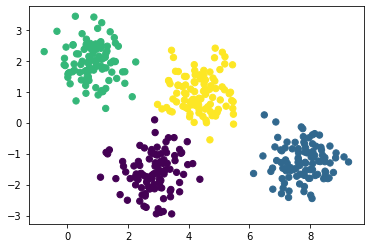

In [11]:
plt.scatter(X[:,0],X[:,1],c=labels, s=40,cmap='viridis')

In [12]:
from sklearn.mixture import GaussianMixture

In [13]:
gmm = GaussianMixture(n_components=4).fit(X)

In [14]:
labels=gmm.predict(X)

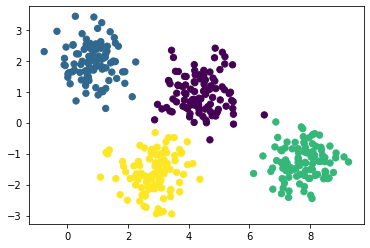

In [15]:
plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis')

In [17]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.531 0.    0.469 0.   ]
 [0.    0.    0.    1.   ]
 [0.    0.    0.    1.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    0.    1.   ]]


In [18]:
from sklearn.datasets import make_moons

In [38]:
X_moons, y_moons = make_moons(200,noise=0.05,random_state=0)

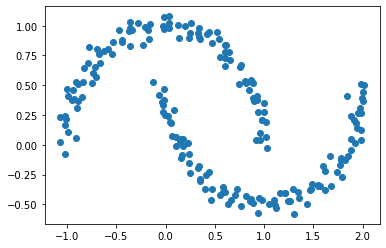

In [39]:
plt.scatter(X_moons[:,0],X_moons[:,1])

In [40]:
gmm2= GaussianMixture(n_components=2,covariance_type='full',random_state=0)

In [41]:
gmm16= GaussianMixture(n_components=16,covariance_type='full',random_state=0)

In [42]:
import numpy as np

In [43]:
n_components = np.arange(1,21)

In [44]:
models = [GaussianMixture(n,covariance_type='full',random_state=0).fit(X_moons) for n in n_components]

Text(0.5, 0, 'n_components')

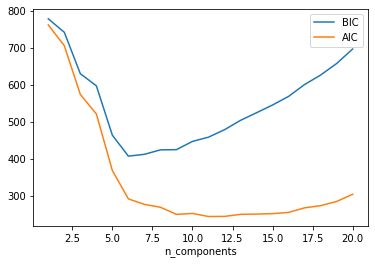

In [46]:
plt.plot(n_components,[m.bic(X_moons) for m in models], label='BIC')
plt.plot(n_components,[m.aic(X_moons) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [47]:
from sklearn.datasets import load_digits

In [48]:
digits = load_digits()

In [49]:
digits.data.shape

(1797, 64)

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(.99,whiten=True)

In [52]:
data=pca.fit_transform(digits.data)

In [53]:
data.shape

(1797, 41)

In [54]:
n_components=np.arange(50,210,10)

In [55]:
models = [GaussianMixture(n,covariance_type='full',random_state=0) for n in n_components]

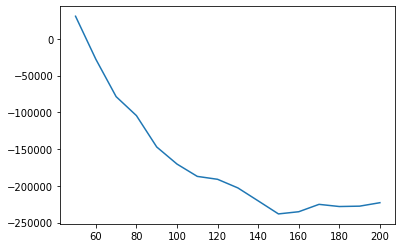

In [56]:
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics)

In [57]:
gmm = GaussianMixture(110, covariance_type='full',random_state=0).fit(data)

In [58]:
data_new = gmm.sample(100)